# Planet monthly mosaic data

* **Products used:** 
Planet API


## Background

## Description
This notebook demonstrates how to how to use the Planet monthly mosaic data:

1. 

***

**Important details:**

* Datacube product names: `Planet Monthly Mosaic`
* Date-range: 2020-09 &ndash; present
* Spatial resolution: 


## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell. 

### Load packages
Import Python packages that are used for the analysis.

In [1]:
import folium
import ipywidgets
from datetime import datetime, timedelta
from IPython.display import HTML, display

import datacube

from deafrica_tools.waterbodies import (
    get_geohashes,
    get_waterbodies,
    get_waterbody,
    get_time_series,
    display_time_series,
)

from deafrica_tools.datahandling import mostcommon_crs

In [2]:
def get_last_calendar_month():
    # Get the current date
    today = datetime.today()
    
    # Calculate the first day of the current month
    first_day_of_current_month = today.replace(day=1)
    
    # Subtract one day to get the last day of the previous month
    last_day_of_last_month = first_day_of_current_month - timedelta(days=1)
    
    # Extract the year and month from the last day of the previous month
    year = last_day_of_last_month.year
    month = last_day_of_last_month.month
    
    return year, month

In [3]:
# Set the central latitude and longitude
lat =  6.74248
lon = -1.69340

# Set the buffer to load around the central coordinates
buffer = 0.05

# Compute the bounding box coordinates
xlim = (lon-buffer, lon+buffer)
ylim =  (lat+buffer, lat-buffer)

# Create a bounding box from study area coordinates
bbox = (xlim[0], ylim[1], xlim[1], ylim[0])

# Select all water bodies located within the bounding box
polygons = get_waterbodies(bbox, crs="EPSG:4326")

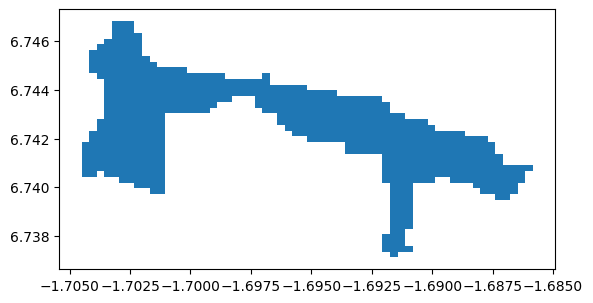

In [4]:
# Plot the waterbody polygons located within the bounding box
polygons.plot();

In [9]:
def loadmap(lat, lng, tile):
    mmap = folium.Map(location=(lat, lon), zoom_start=14, tiles=None)
#     folium.TileLayer(tile, attr='Planet NICFI', name=f'Planet NICFI {year:04d}-{month:02d}', show=True).add_to(mmap)
    folium.TileLayer(tile, attr='Planet NICFI', name=f'Planet NICFI', show=True, no_wrap=True).add_to(mmap)
    folium.TileLayer('OpenStreetMap', show=False).add_to(mmap)
    folium.GeoJson(polygons, zoom_on_click=True, name='Water Body').add_to(mmap)
    folium.LayerControl().add_to(mmap)

    return mmap

In [10]:
current_year, current_month = get_last_calendar_month()
out = ipywidgets.Output(layout={'border': '1px solid black'})

year_list = [x for x in range(2020, current_year+1, 1)]
year_wdiget = ipywidgets.Dropdown(
    options=year_list,
    value=year_list[-1],
    description='Year:',
    disabled=False,
)

month_list = [x for x in range(1, current_month+1, 1)]
month_wdiget = ipywidgets.Dropdown(
    options=month_list,
    value=month_list[-1],
    description='Month:',
    disabled=False,
)

button = ipywidgets.Button(
    description='Display Map',
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    icon='map' # (FontAwesome names without the `fa-` prefix)
)

def on_dropdown_change(change):
    change = change['new']
    if change == 2020:
        month_list = [9, 10, 11, 12]
    elif change == int(current_year):
        month_list = [x for x in range(1, current_month+1, 1)]
    else:
        month_list = [x for x in range(1, 13, 1)]
    month_wdiget.options = month_list

planet_monthly = f"https://api.digitalearth.africa/planet/tiles/basemaps/v1/planet-tiles/planet_medres_visual_{year_wdiget.value:04d}-{month_wdiget.value:02d}_mosaic/gmap/"+"{z}/{x}/{y}.png"    

def button_click(b):
    planet_monthly = f"https://api.digitalearth.africa/planet/tiles/basemaps/v1/planet-tiles/planet_medres_visual_{year_wdiget.value:04d}-{month_wdiget.value:02d}_mosaic/gmap/"+"{z}/{x}/{y}.png"
    out.clear_output()
    with out:
        display(loadmap(lat, lon, planet_monthly))
    out

app = ipywidgets.AppLayout(
          left_sidebar=year_wdiget,
          center=month_wdiget,
          right_sidebar=button,)
year_wdiget.observe(on_dropdown_change, names='value')
button.on_click(button_click)
display(app)

with out:
    display(loadmap(lat, lon, planet_monthly))
out

AppLayout(children=(Dropdown(description='Year:', index=4, layout=Layout(grid_area='left-sidebar'), options=(2…

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

### Using Planet Basemap with DE Africa Product

#### WaterBodies

In [7]:
# Display last calendar month
year, month = get_last_calendar_month()
planet_monthly = f"https://api.digitalearth.africa/planet/tiles/basemaps/v1/planet-tiles/planet_medres_visual_{year:04d}-{month:02d}_mosaic/gmap/"+"{z}/{x}/{y}.png"
m = folium.Map(location=(lat, lon), zoom_start=14, tiles=None)

folium.TileLayer(planet_monthly, attr='Planet NICFI', name=f'Planet NICFI {year:04d}-{month:02d}', show=True).add_to(m)
folium.TileLayer('OpenStreetMap', show=False).add_to(m)
folium.GeoJson(polygons, zoom_on_click=True, name='Water Body').add_to(m)
folium.LayerControl().add_to(m)

m

#### Water Observation from Space

In [29]:
dc = datacube.Datacube(app="wofs")

# Create a reusable query
query = {
    'x': xlim,
    'y': ylim,
    'time': '2022',
    'resolution': (-30, 30)
}

#grab crs of location
output_crs = mostcommon_crs(dc=dc, product='wofs_ls_summary_annual', query=query)

# Load WOfS feature layers 
wofs= dc.load(product = 'wofs_ls_summary_annual',
               group_by="solar_day",

               **query)

print(wofs)

<xarray.Dataset>
Dimensions:      (time: 1, y: 423, x: 323)
Coordinates:
  * time         (time) datetime64[ns] 2022-07-02T11:59:59.999999
  * y            (y) float64 8.646e+05 8.645e+05 ... 8.519e+05 8.519e+05
  * x            (x) float64 -1.682e+05 -1.682e+05 ... -1.586e+05 -1.586e+05
    spatial_ref  int32 6933
Data variables:
    count_wet    (time, y, x) int16 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    count_clear  (time, y, x) int16 7 7 7 7 7 7 7 7 7 ... 10 10 9 9 10 10 10 10
    frequency    (time, y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    crs:           epsg:6933
    grid_mapping:  spatial_ref


In [45]:
wofs['frequency'].to_numpy

<bound method DataArray.to_numpy of <xarray.DataArray 'frequency' (time: 1, y: 423, x: 323)>
array([[[0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        ...,
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0.1],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ]]], dtype=float32)
Coordinates:
  * time         (time) datetime64[ns] 2022-07-02T11:59:59.999999
  * y            (y) float64 8.646e+05 8.645e+05 ... 8.519e+05 8.519e+05
  * x            (x) float64 -1.682e+05 -1.682e+05 ... -1.586e+05 -1.586e+05
    spatial_ref  int32 6933
Attributes:
    units:         1
    nodata:        nan
    crs:           epsg:6933
    grid_mapping:  spatial_ref>

In [39]:
folium.raster_layers.ImageOverlay(
    image=wofs['frequency'].to_numpy(),
    bounds=[[wofs.geobox.extent.boundingbox.top, wofs.geobox.extent.boundingbox.left], 
            [wofs.geobox.extent.boundingbox.bottom, wofs.geobox.extent.boundingbox.right]],
    mercator_project=True,
    opacity=0.25,
).add_to(m)

ValueError: Data must be NxM (mono), NxMx3 (RGB), or NxMx4 (RGBA)

In [15]:
import rioxarray

In [ ]:
rioxarray.open_rasterio(wofs['frequency'])

TypeError: invalid path or file: <xarray.DataArray 'frequency' (time: 1, y: 423, x: 323)>
array([[[0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        ...,
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0.1],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ]]], dtype=float32)
Coordinates:
  * time         (time) datetime64[ns] 2022-07-02T11:59:59.999999
  * y            (y) float64 8.646e+05 8.645e+05 ... 8.519e+05 8.519e+05
  * x            (x) float64 -1.682e+05 -1.682e+05 ... -1.586e+05 -1.586e+05
    spatial_ref  int32 6933
Attributes:
    units:         1
    nodata:        nan
    crs:           epsg:6933
    grid_mapping:  spatial_ref

In [32]:
folium.raster_layers.ImageOverlay(
    image=wofs.frequency,
     bounds=[[0, -60], [60, 60]],
    origin="lower").add_to(m)

m

TypeError: Object of type DataArray is not JSON serializable

In [ ]:
wofls.frequency.plot()

In [ ]:
# Enable selection of layers

planet_202401 = "https://api.digitalearth.africa/planet/tiles/basemaps/v1/planet-tiles/planet_medres_visual_2024-01_mosaic/gmap/{z}/{x}/{y}.png"
planet_202402 = "https://api.digitalearth.africa/planet/tiles/basemaps/v1/planet-tiles/planet_medres_visual_2024-02_mosaic/gmap/{z}/{x}/{y}.png"

m=folium.Map(location=(0,20), zoom_start=6)
folium.TileLayer(planet_202401, attr='Planet NICFI', name='Planet NICFI 2024-01').add_to(m)
folium.TileLayer(planet_202402, attr='Planet NICFI', name='Planet NICFI 2024-02').add_to(m)
folium.LayerControl().add_to(m)
m

#Save this to a web app!
#m.save("select_planet.html")